In [1]:
import pandas as pd
import numpy as np

In [2]:
test=pd.read_excel("D:\EVUEME\MAY\MAY_17\Test\Test_Praat_Librosa_Audio_features.xlsx")
val=pd.read_excel("D:\EVUEME\MAY\MAY_17\Val\Validation_Praat_Librosa_Audio_features.xlsx")
train=pd.read_excel("D:\EVUEME\MAY\MAY_17\Train\Final_Audio_Features_695.xlsx")

In [3]:
train.head(3).iloc[:,13:]

,nsyll,npause,long_pause,dur(s),phonationtime(s),speechrate(nsyll / dur),articulation rate(nsyll / phonationtime),ASD(speakingtime / nsyll),HNR,localJitter,...,tonnetz_3_var,tonnetz_4_var,tonnetz_5_var,tonnetz_6_var,poly_1_mean,poly_2_mean,poly_1_std,poly_2_std,poly_1_var,poly_2_var
0,58.0,0.0,0.0,15.287982,15.287982,3.793830,3.793830,0.263586,5.761763,0.019823,...,0.020239,0.026564,0.003056,0.003414,-0.000126,1.220787,0.000169,1.320513,2.863816e-08,1.743753
1,40.0,3.0,0.0,15.287982,13.559982,2.616434,2.949856,0.339000,7.881200,0.016353,...,0.026327,0.023972,0.003701,0.002706,-0.000016,0.447918,0.000139,0.471230,1.929210e-08,0.222058
2,46.0,1.0,0.0,15.287982,14.055982,3.008899,3.272628,0.305565,4.767605,0.017839,...,0.027958,0.033076,0.004186,0.004257,-0.000179,1.904819,0.000314,2.284673,9.855934e-08,5.219729


In [4]:
train.dropna(inplace = True)

In [5]:
train.head()

,Unnamed: 0,Old File Name,New File Name,Audio New,Audio Spect,Transcript,E_Level,extraversion,neuroticism,agreeableness,...,tonnetz_3_var,tonnetz_4_var,tonnetz_5_var,tonnetz_6_var,poly_1_mean,poly_2_mean,poly_1_std,poly_2_std,poly_1_var,poly_2_var
0,0,J4GQm9j0JZ0.003.mp4,file1,training80_05_4752.wav,training80_05_4752.wav.png,He's cutting it and then turn around and see t...,1,0.523364,0.552083,0.626374,...,0.020239,0.026564,0.003056,0.003414,-0.000126,1.220787,0.000169,1.320513,2.863816e-08,1.743753
1,1,zEyRyTnIw5I.005.mp4,file2,training80_06_5677.wav,training80_06_5677.wav.png,Responsibility to house the organ I had been g...,1,0.345794,0.375000,0.472527,...,0.026327,0.023972,0.003701,0.002706,-0.000016,0.447918,0.000139,0.471230,1.929210e-08,0.222058
2,2,nskJh7v6v1U.004.mp4,file3,training80_05_4124.wav,training80_05_4124.wav.png,I actually got quite a few sets of black pens ...,0,0.252336,0.291667,0.406593,...,0.027958,0.033076,0.004186,0.004257,-0.000179,1.904819,0.000314,2.284673,9.855934e-08,5.219729
3,3,6wHQsN5g2RM.000.mp4,file4,training80_03_2813.wav,training80_03_2813.wav.png,I ate a lot. I'd like a lot of foods. I rememb...,1,0.457944,0.489583,0.505495,...,0.028146,0.024582,0.003012,0.003344,-0.000223,2.079331,0.000329,2.710881,1.084090e-07,7.348878
4,4,dQOeQYWIgm8.000.mp4,file5,training80_06_5537.wav,training80_06_5537.wav.png,Now I'll ask you guys to leave a question in t...,1,0.607477,0.489583,0.406593,...,0.036176,0.042196,0.005526,0.005015,-0.000125,1.094016,0.000142,1.193521,2.003398e-08,1.424493


In [6]:
train_y = train.iloc[:,7:13]
train_x = train.iloc[:,13:]

In [7]:
train_x

,nsyll,npause,long_pause,dur(s),phonationtime(s),speechrate(nsyll / dur),articulation rate(nsyll / phonationtime),ASD(speakingtime / nsyll),HNR,localJitter,...,tonnetz_3_var,tonnetz_4_var,tonnetz_5_var,tonnetz_6_var,poly_1_mean,poly_2_mean,poly_1_std,poly_2_std,poly_1_var,poly_2_var
0,58.0,0.0,0.0,15.287982,15.287982,3.793830,3.793830,0.263586,5.761763,0.019823,...,0.020239,0.026564,0.003056,0.003414,-0.000126,1.220787,0.000169,1.320513,2.863816e-08,1.743753
1,40.0,3.0,0.0,15.287982,13.559982,2.616434,2.949856,0.339000,7.881200,0.016353,...,0.026327,0.023972,0.003701,0.002706,-0.000016,0.447918,0.000139,0.471230,1.929210e-08,0.222058
2,46.0,1.0,0.0,15.287982,14.055982,3.008899,3.272628,0.305565,4.767605,0.017839,...,0.027958,0.033076,0.004186,0.004257,-0.000179,1.904819,0.000314,2.284673,9.855934e-08,5.219729
3,35.0,6.0,0.0,15.287982,10.487982,2.289380,3.337153,0.299657,5.421238,0.016886,...,0.028146,0.024582,0.003012,0.003344,-0.000223,2.079331,0.000329,2.710881,1.084090e-07,7.348878
4,49.0,0.0,0.0,15.287982,15.287982,3.205132,3.205132,0.312000,10.053853,0.009795,...,0.036176,0.042196,0.005526,0.005015,-0.000125,1.094016,0.000142,1.193521,2.003398e-08,1.424493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,25.0,4.0,2.0,15.287982,8.487982,1.635271,2.945341,0.339519,4.931769,0.021349,...,0.025493,0.011943,0.002129,0.002478,-0.000071,0.827372,0.000206,1.475002,4.249415e-08,2.175630
5996,46.0,4.0,0.0,15.247982,11.807982,3.016793,3.895670,0.256695,7.444601,0.023288,...,0.043259,0.036821,0.005145,0.007895,-0.000053,0.510063,0.000107,0.827248,1.141537e-08,0.684339
5997,57.0,0.0,0.0,15.287982,15.287982,3.728419,3.728419,0.268210,6.816946,0.016022,...,0.044818,0.046435,0.005876,0.005004,-0.000181,2.225002,0.000405,2.234160,1.637177e-07,4.991470
5998,52.0,3.0,0.0,15.277982,12.765982,3.403591,4.073326,0.245500,7.957025,0.020040,...,0.029371,0.028361,0.003795,0.003763,-0.000038,0.341459,0.000055,0.433204,2.978731e-09,0.187666


In [8]:
train_y

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
0,0.523364,0.552083,0.626374,0.601942,0.504673,0.488889
1,0.345794,0.375000,0.472527,0.582524,0.457944,0.366667
2,0.252336,0.291667,0.406593,0.485437,0.373832,0.511111
3,0.457944,0.489583,0.505495,0.398058,0.457944,0.377778
4,0.607477,0.489583,0.406593,0.621359,0.570093,0.622222
...,...,...,...,...,...,...
5995,0.523364,0.479167,0.626374,0.621359,0.588785,0.544444
5996,0.728972,0.760417,0.582418,0.524272,0.616822,0.822222
5997,0.700935,0.770833,0.747253,0.699029,0.691589,0.788889
5998,0.317757,0.531250,0.582418,0.679612,0.616822,0.588889


In [9]:
val.head(3)

,Unnamed: 0,Old File Name,New File Name,Audio New,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness,...,tonnetz_3_var,tonnetz_4_var,tonnetz_5_var,tonnetz_6_var,poly_1_mean,poly_2_mean,poly_1_std,poly_2_std,poly_1_var,poly_2_var
0,0,-DOqN0d8KHw.001.mp4,file1,validation80_011.wav,0.457944,0.541667,0.549451,0.504854,0.495327,0.566667,...,0.032656,0.035218,0.004829,0.004040,-0.000037,0.296191,0.000043,0.338785,1.847630e-09,0.114775
1,1,05l5bteT_qA.004.mp4,file2,validation80_012.wav,0.439252,0.375000,0.439560,0.417476,0.420561,0.700000,...,0.023974,0.023405,0.003881,0.001923,-0.000246,2.037528,0.000314,2.592047,9.885628e-08,6.718710
2,2,3ccY8jYkI5o.001.mp4,file3,validation80_013.wav,0.813084,0.708333,0.835165,0.805825,0.803738,0.822222,...,0.019742,0.016554,0.002103,0.001869,-0.000325,2.649245,0.000248,1.987675,6.144078e-08,3.950853


In [10]:
val.dropna(inplace = True)

In [11]:
val_y = val.iloc[:,4:10]
val_x = val.iloc[:,10:]

In [12]:
val_y

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
0,0.457944,0.541667,0.549451,0.504854,0.495327,0.566667
1,0.439252,0.375000,0.439560,0.417476,0.420561,0.700000
2,0.813084,0.708333,0.835165,0.805825,0.803738,0.822222
3,0.317757,0.395833,0.472527,0.572816,0.429907,0.400000
4,0.495327,0.562500,0.549451,0.786408,0.579439,0.666667
...,...,...,...,...,...,...
1995,0.299065,0.375000,0.516484,0.388350,0.392523,0.344444
1996,0.607477,0.583333,0.461538,0.553398,0.532710,0.522222
1997,0.775701,0.822917,0.637363,0.728155,0.813084,0.866667
1998,0.504673,0.677083,0.571429,0.553398,0.588785,0.644444


In [13]:
val_x

,nsyll,npause,long_pause,dur(s),phonationtime(s),speechrate(nsyll / dur),articulation rate(nsyll / phonationtime),ASD(speakingtime / nsyll),HNR,localJitter,...,tonnetz_3_var,tonnetz_4_var,tonnetz_5_var,tonnetz_6_var,poly_1_mean,poly_2_mean,poly_1_std,poly_2_std,poly_1_var,poly_2_var
0,55,3,0,15.32,12.488,3.590078,4.404228,0.227055,15.100809,0.015211,...,0.032656,0.035218,0.004829,0.004040,-0.000037,0.296191,0.000043,0.338785,1.847630e-09,0.114775
1,42,5,0,15.32,10.024,2.741514,4.189944,0.238667,8.193840,0.019174,...,0.023974,0.023405,0.003881,0.001923,-0.000246,2.037528,0.000314,2.592047,9.885628e-08,6.718710
2,69,0,0,15.32,14.212,4.503916,4.855052,0.205971,8.529081,0.021952,...,0.019742,0.016554,0.002103,0.001869,-0.000325,2.649245,0.000248,1.987675,6.144078e-08,3.950853
3,53,2,1,15.32,11.828,3.459530,4.480893,0.223170,13.068878,0.014243,...,0.031172,0.032231,0.003818,0.003827,-0.000300,2.408754,0.000298,2.354146,8.895651e-08,5.542005
4,47,4,0,15.32,12.232,3.067885,3.842381,0.260255,10.561814,0.028507,...,0.010097,0.010791,0.000950,0.001348,-0.000116,0.938133,0.000138,1.091072,1.903537e-08,1.190439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,53,2,0,15.32,13.848,3.459530,3.827267,0.261283,11.548116,0.014262,...,0.029296,0.034897,0.003884,0.003451,-0.000104,0.839888,0.000106,0.838712,1.116345e-08,0.703437
1996,55,3,0,15.32,13.560,3.590078,4.056047,0.246545,13.421975,0.015962,...,0.040752,0.026175,0.004657,0.003541,-0.000119,0.962073,0.000108,0.856336,1.170950e-08,0.733311
1997,66,0,0,15.32,15.320,4.308094,4.308094,0.232121,11.476547,0.021569,...,0.028903,0.031640,0.003062,0.003083,-0.000123,0.976710,0.000111,0.881472,1.238151e-08,0.776992
1998,61,2,0,15.32,14.280,3.981723,4.271709,0.234098,7.047064,0.033858,...,0.018708,0.016711,0.002531,0.002466,-0.000149,1.217888,0.000145,1.138878,2.107425e-08,1.297044


In [14]:
test.head(3)

,Unnamed: 0,Old File Name,New File Name,Audio New,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness,...,tonnetz_3_var,tonnetz_4_var,tonnetz_5_var,tonnetz_6_var,poly_1_mean,poly_2_mean,poly_1_std,poly_2_std,poly_1_var,poly_2_var
0,0.0,13kjwEtSyXc.003.mp4,file1,test80_011.wav,0.439252,0.541667,0.527473,0.485437,0.448598,0.566667,...,0.036348,0.036972,0.004620,0.003639,-0.000131,1.049841,0.000096,0.762121,9.225204e-09,0.580829
1,1.0,1Lv72Si4GnY.000.mp4,file2,test80_012.wav,0.467290,0.322917,0.263736,0.106796,0.158879,0.411111,...,0.046315,0.035125,0.004554,0.006017,-0.000092,0.761132,0.000103,0.835517,1.053207e-08,0.698089
2,2.0,1uC-2TZqplE.003.mp4,file3,test80_013.wav,0.224299,0.427083,0.340659,0.708738,0.457944,0.477778,...,0.018984,0.021433,0.002101,0.002278,-0.000194,1.578832,0.000167,1.290152,2.787290e-08,1.664492


In [15]:
test.dropna(inplace = True)

In [16]:
test_y = test.iloc[:,4:10]
test_x = test.iloc[:,10:]

In [17]:
test_x

,nsyll,npause,long_pause,dur(s),phonationtime(s),speechrate(nsyll / dur),articulation rate(nsyll / phonationtime),ASD(speakingtime / nsyll),HNR,localJitter,...,tonnetz_3_var,tonnetz_4_var,tonnetz_5_var,tonnetz_6_var,poly_1_mean,poly_2_mean,poly_1_std,poly_2_std,poly_1_var,poly_2_var
0,70.0,1.0,0.0,15.320,14.104,4.569191,4.963131,0.201486,12.011792,0.019102,...,0.036348,0.036972,0.004620,0.003639,-0.000131,1.049841,0.000096,0.762121,9.225204e-09,0.580829
1,41.0,5.0,0.0,15.320,10.760,2.676240,3.810409,0.262439,15.015025,0.015439,...,0.046315,0.035125,0.004554,0.006017,-0.000092,0.761132,0.000103,0.835517,1.053207e-08,0.698089
2,66.0,0.0,0.0,15.320,15.320,4.308094,4.308094,0.232121,11.251338,0.024764,...,0.018984,0.021433,0.002101,0.002278,-0.000194,1.578832,0.000167,1.290152,2.787290e-08,1.664492
3,65.0,2.0,0.0,15.320,14.072,4.242820,4.619102,0.216492,8.895214,0.016013,...,0.030073,0.033754,0.003152,0.004431,-0.000148,1.225513,0.000134,1.096260,1.794872e-08,1.201787
4,73.0,3.0,0.0,15.320,13.176,4.765013,5.540376,0.180493,8.220033,0.021417,...,0.016594,0.022924,0.002875,0.002387,-0.000147,1.204550,0.000131,1.056084,1.724611e-08,1.115312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,27.0,1.0,1.0,15.320,6.420,1.762402,4.205607,0.237778,15.767037,0.014925,...,0.011370,0.010545,0.001161,0.001714,-0.000011,0.087816,0.000019,0.147951,3.743081e-10,0.021889
1996,56.0,3.0,0.0,15.320,12.984,3.655352,4.313001,0.231857,13.514974,0.017373,...,0.026647,0.028588,0.002696,0.004530,-0.000026,0.201890,0.000023,0.173287,5.107189e-10,0.030029
1997,56.0,0.0,0.0,15.320,15.320,3.655352,3.655352,0.273571,10.989333,0.014889,...,0.026605,0.037595,0.003101,0.004289,-0.000069,0.558200,0.000057,0.454771,3.205813e-09,0.206817
1998,63.0,3.0,0.0,15.320,13.192,4.112272,4.775622,0.209397,12.026151,0.013483,...,0.029106,0.027280,0.003080,0.003743,-0.000074,0.610896,0.000082,0.666845,6.708069e-09,0.444683


In [18]:
train_y.describe()

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
count,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,0.476289,0.520574,0.548503,0.522897,0.503984,0.566279
std,0.152183,0.153382,0.136212,0.155153,0.150090,0.146947
min,0.018692,0.020833,0.000000,0.000000,0.000000,0.000000
25%,0.373832,0.416667,0.461538,0.417476,0.401869,0.466667
50%,0.476636,0.531250,0.560440,0.524272,0.514019,0.577778
75%,0.588785,0.635417,0.637363,0.631068,0.616822,0.666667
max,0.925234,0.979167,1.000000,0.970874,1.000000,1.000000


In [19]:
train_y.head(2)

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
0,0.523364,0.552083,0.626374,0.601942,0.504673,0.488889
1,0.345794,0.375000,0.472527,0.582524,0.457944,0.366667


In [20]:
val_y.head(2)

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
0,0.457944,0.541667,0.549451,0.504854,0.495327,0.566667
1,0.439252,0.375000,0.439560,0.417476,0.420561,0.700000


In [21]:
test_y.head(2)

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
0,0.439252,0.541667,0.527473,0.485437,0.448598,0.566667
1,0.467290,0.322917,0.263736,0.106796,0.158879,0.411111


In [22]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import initializers

In [23]:
def scale_datasets(x_train, x_val, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_val_scaled = pd.DataFrame(
      standard_scaler.transform(x_val),
      columns = x_test.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled,x_val_scaled, x_test_scaled
x_train_scaled, x_val_scaled, x_test_scaled = scale_datasets(train_x, val_x ,test_x)

In [24]:
len(train_y.values[:,1])

5983

In [25]:
learning_rate = 0.01
initializer = tf.keras.initializers.RandomUniform(minval=0.,maxval=1.)

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(512, activation='relu', kernel_initializer=initializer),
        Dropout(0.2),
        Dense(512, activation='relu', kernel_initializer=initializer),
        Dropout(0.2),
        Dense(256, activation='relu', kernel_initializer=initializer),
        Dropout(0.2),
        Dense(128,  activation='relu', kernel_initializer=initializer),
        Dropout(0.2),
        Dense(64,  activation='relu', kernel_initializer=initializer),
        Dense(6, activation='sigmoid')
      ])
    return model
# build the model
model = build_model_using_sequential()

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

# loss function
model.compile(
    optimizer = 'adam', 
    loss = 'mean_absolute_error',metrics=['mae']
)
# train the model
history = model.fit(
    x = x_train_scaled.values, 
    y = train_y.values, 
    validation_data = (x_val_scaled.values, val_y.values),
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50


c:\Python3.9.4inst\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


187/187 [==============================] - 3s 10ms/step - loss: 0.2993 - mae: 0.2993 - val_loss: 0.1277 - val_mae: 0.1277
Epoch 2/50
187/187 [==============================] - 2s 9ms/step - loss: 0.2988 - mae: 0.2988 - val_loss: 0.1273 - val_mae: 0.1273
Epoch 3/50
187/187 [==============================] - 2s 9ms/step - loss: 0.2984 - mae: 0.2984 - val_loss: 0.1273 - val_mae: 0.1273
Epoch 4/50
187/187 [==============================] - 2s 9ms/step - loss: 0.2985 - mae: 0.2985 - val_loss: 0.1273 - val_mae: 0.1273
Epoch 5/50
187/187 [==============================] - 2s 9ms/step - loss: 0.2985 - mae: 0.2985 - val_loss: 0.1273 - val_mae: 0.1273
Epoch 6/50
187/187 [==============================] - 2s 9ms/step - loss: 0.2985 - mae: 0.2985 - val_loss: 0.1273 - val_mae: 0.1273
Epoch 7/50
187/187 [==============================] - 2s 9ms/step - loss: 0.2986 - mae: 0.2986 - val_loss: 0.1273 - val_mae: 0.1273
Epoch 8/50
187/187 [==============================] - 2s 9ms/step - loss: 0.4904 - mae

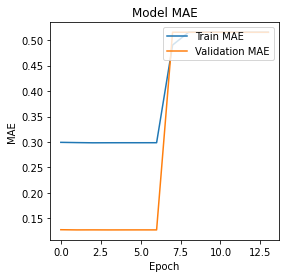

In [27]:
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train MAE', 'Validation MAE'], loc='upper right')

In [28]:
loss, mae = model.evaluate(x_test_scaled.values, test_y.values)

63/63 [==============================] - 0s 3ms/step - loss: 0.5169 - mae: 0.5169


In [29]:
loss

0.5169191360473633

In [30]:
mae

0.5169191360473633

In [31]:
from sklearn.metrics import mean_absolute_error

train

In [32]:
y_pred = model.predict(x_train_scaled.values)

# Calculate the MAE on the train data
mae = mean_absolute_error(train_y.values, y_pred)
print("Mean Absolute Error:", mae)
feature = ["extraversion",	"neuroticism",	"agreeableness",	"conscientiousness",	"interview"	,"openness"]
for i in range(6):
  print(feature[i])
  mae = mean_absolute_error(train_y.values[:,i], y_pred[:,i])
  print("Mean Absolute Error:", mae)
  print("1-mae",1-mae,"\n")

187/187 [==============================] - 1s 2ms/step
Mean Absolute Error: 0.5154551038810665
extraversion
Mean Absolute Error: 0.47628873709154085
1-mae 0.5237112629084592 

neuroticism
Mean Absolute Error: 0.5205739177670061
1-mae 0.4794260822329939 

agreeableness
Mean Absolute Error: 0.5485028092415686
1-mae 0.4514971907584314 

conscientiousness
Mean Absolute Error: 0.4771025997608115
1-mae 0.5228974002391885 

interview
Mean Absolute Error: 0.5039840295166518
1-mae 0.4960159704833482 

openness
Mean Absolute Error: 0.5662785299088153
1-mae 0.43372147009118467 



val

In [33]:
y_pred_val = model.predict(x_val_scaled.values)

# Calculate the MAE on the val data
mae = mean_absolute_error(val_y.values, y_pred_val)
print("Mean Absolute Error:", mae)

feature = ["extraversion",	"neuroticism",	"agreeableness",	"conscientiousness",	"interview"	,"openness"]
for i in range(6):
  print(feature[i])
  mae = mean_absolute_error(val_y.values[:,i], y_pred_val[:,i])
  print("Mean Absolute Error:", mae)
  print("1-mae",1-mae,"\n")

63/63 [==============================] - 0s 2ms/step
Mean Absolute Error: 0.5155767356166193
extraversion
Mean Absolute Error: 0.4770615998351844
1-mae 0.5229384001648156 

neuroticism
Mean Absolute Error: 0.5220284318637275
1-mae 0.4779715681362725 

agreeableness
Mean Absolute Error: 0.5512398423220066
1-mae 0.4487601576779934 

conscientiousness
Mean Absolute Error: 0.47163744965659476
1-mae 0.5283625503434053 

interview
Mean Absolute Error: 0.5049210570674058
1-mae 0.49507894293259425 

openness
Mean Absolute Error: 0.5665720329547984
1-mae 0.4334279670452016 



test

In [34]:
y_pred = model.predict(x_test_scaled.values)

# Calculate the MAE on the testing data
mae = mean_absolute_error(test_y.values, y_pred)
print("Mean Absolute Error:", mae)
feature = ["extraversion",	"neuroticism",	"agreeableness",	"conscientiousness",	"interview"	,"openness"]
for i in range(6):
  print(feature[i])
  mae = mean_absolute_error(test_y.values[:,i], y_pred[:,i])
  print("Mean Absolute Error:", mae)
  print("1-mae",1-mae,"\n")

63/63 [==============================] - 0s 2ms/step
Mean Absolute Error: 0.516919175556017
extraversion
Mean Absolute Error: 0.47785636103393114
1-mae 0.5221436389660689 

neuroticism
Mean Absolute Error: 0.5216622872872873
1-mae 0.47833771271271275 

agreeableness
Mean Absolute Error: 0.5516560516560516
1-mae 0.4483439483439484 

conscientiousness
Mean Absolute Error: 0.47482433890200876
1-mae 0.5251756610979912 

interview
Mean Absolute Error: 0.5073812129886895
1-mae 0.49261878701131045 

openness
Mean Absolute Error: 0.5681348014681348
1-mae 0.4318651985318652 

